In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_csv('/content/train_data part-a.txt', sep='\t')

print(df1.head())
print("--------------------------------------------------")
print("the shape of the dataset is :", df1.shape)

   ID           Target                                              Tweet  \
0   1  Hillary Clinton  @tedcruz And, #HandOverTheServer she wiped cle...   
1   2  Hillary Clinton  Hillary is our best choice if we truly want to...   
2   3  Hillary Clinton  @TheView I think our country is ready for a fe...   
3   4  Hillary Clinton  I just gave an unhealthy amount of my hard-ear...   
4   5  Hillary Clinton  @PortiaABoulger Thank you for adding me to you...   

    Stance  
0  AGAINST  
1    FAVOR  
2  AGAINST  
3  AGAINST  
4     NONE  
--------------------------------------------------
the shape of the dataset is : (100, 4)


In [ ]:
df2 = pd.read_csv('/content/train_data part-b.txt', sep=None, engine='python', encoding='latin-1')

print(df2.head())
print("--------------------------------------------------")
print("the shape of the dataset is :", df2.shape)

    ID   Target                                              Tweet   Stance
0  101  Atheism  dear lord thank u for all of ur blessings forg...  AGAINST
1  102  Atheism  Blessed are the peacemakers, for they shall be...  AGAINST
2  103  Atheism  I am not conformed to this world. I am transfo...  AGAINST
3  104  Atheism  Salah should be prayed with #focus and #unders...  AGAINST
4  105  Atheism  And stay in your houses and do not display you...  AGAINST
--------------------------------------------------
the shape of the dataset is : (2814, 4)


In [ ]:
data=pd.concat([df1,df2],axis=0)

print(data.head())

print("--------------------------------------------------")

print("Shape of the DataFrame:", data.shape)

   ID           Target                                              Tweet  \
0   1  Hillary Clinton  @tedcruz And, #HandOverTheServer she wiped cle...   
1   2  Hillary Clinton  Hillary is our best choice if we truly want to...   
2   3  Hillary Clinton  @TheView I think our country is ready for a fe...   
3   4  Hillary Clinton  I just gave an unhealthy amount of my hard-ear...   
4   5  Hillary Clinton  @PortiaABoulger Thank you for adding me to you...   

    Stance  
0  AGAINST  
1    FAVOR  
2  AGAINST  
3  AGAINST  
4     NONE  
--------------------------------------------------
Shape of the DataFrame: (2914, 4)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2914 entries, 0 to 2813
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      2914 non-null   int64 
 1   Target  2914 non-null   object
 2   Tweet   2914 non-null   object
 3   Stance  2914 non-null   object
dtypes: int64(1), object(3)
memory usage: 113.8+ KB


In [ ]:
print("The null values in the dataframe:")
print(data.isnull().sum())

The null values in the dataframe:
ID        0
Target    0
Tweet     0
Stance    0
dtype: int64


In [ ]:
data.duplicated().sum()
print("\nNumber of duplicates:",data.duplicated().sum())


Number of duplicates: 0


In [ ]:
data['Target'].value_counts()

,count
Target,
Hillary Clinton,689
Feminist Movement,664
Legalization of Abortion,653
Atheism,513
Climate Change is a Real Concern,395


In [ ]:
data['Stance'].value_counts()

,count
Stance,
AGAINST,1395
NONE,766
FAVOR,753


In [ ]:
import plotly.express as px

target_counts = data['Stance'].value_counts().reset_index()
target_counts.columns = ['Stance', 'count']

fig = px.pie(target_counts, names='Stance', values='count',
             title="Distribution of Stance Categories",
             color_discrete_sequence=px.colors.sequential.Plasma)

fig.show()

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()

def preprocess_text(Tweet):
    text = Tweet
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    cleaned_text = ' '.join(lemmatized_tokens)

    return tokens, lemmatized_tokens, cleaned_text

data[['tokenized_tweet', 'lemmatized_tweet', 'cleaned_tweet']] = data['Tweet'].apply(lambda x: pd.Series(preprocess_text(x)))

data.head()

,ID,Target,Tweet,Stance,tokenized_tweet,lemmatized_tweet,cleaned_tweet
0,1,Hillary Clinton,"@tedcruz And, #HandOverTheServer she wiped cle...",AGAINST,"[and, she, wiped, clean, k, deleted, emails, e...","[and, she, wiped, clean, k, deleted, email, ex...",and she wiped clean k deleted email explains d...
1,2,Hillary Clinton,Hillary is our best choice if we truly want to...,FAVOR,"[hillary, is, our, best, choice, if, we, truly...","[hillary, is, our, best, choice, if, we, truly...",hillary is our best choice if we truly want to...
2,3,Hillary Clinton,@TheView I think our country is ready for a fe...,AGAINST,"[i, think, our, country, is, ready, for, a, fe...","[i, think, our, country, is, ready, for, a, fe...",i think our country is ready for a female pres...
3,4,Hillary Clinton,I just gave an unhealthy amount of my hard-ear...,AGAINST,"[i, just, gave, an, unhealthy, amount, of, my,...","[i, just, gave, an, unhealthy, amount, of, my,...",i just gave an unhealthy amount of my hardearn...
4,5,Hillary Clinton,@PortiaABoulger Thank you for adding me to you...,NONE,"[thank, you, for, adding, me, to, your, list]","[thank, you, for, adding, me, to, your, list]",thank you for adding me to your list


In [ ]:
from IPython.display import display

display(data[['Tweet', 'cleaned_tweet']].sample(10))

,Tweet,cleaned_tweet
2380,We are the #prolifegen and we will abolish abo...,we are the and we will abolish abortion in our...
596,Considering moving yo Antarctica as thats the ...,considering moving yo antarctica a thats the o...
355,Faithful He has been. Faithful He will be. #SemST,faithful he ha been faithful he will be
2124,"@kin2souls @sunbeltgirl @ChristiChat ""@Hillary...",cant even manage and she want to be
1264,It's not about making women stronger. Women ar...,it not about making woman stronger woman are a...
1790,@washingtonpost sir sory mae bi bharat mool ka...,sir sory mae bi bharat mool ka hu par my hart ...
1980,@PhilGlutting @megadreamin Thank you so much f...,thank you so much for rt and fav
140,"RT @FollowDMS: ""Ask and it will be given to yo...",rt ask and it will be given to you seek and yo...
2269,Thank you for another day of life Lord. #Chris...,thank you for another day of life lord
1030,RT @WeNeedFeminism: I don't want to choose bet...,rt i dont want to choose between having a fami...


In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

data['text_no_stopwords'] = data['cleaned_tweet'].apply(remove_stopwords)

display(data[['cleaned_tweet', 'text_no_stopwords']].sample(10))

,cleaned_tweet,text_no_stopwords
2029,hour left let chip in nevada,hour left let chip nevada
80,want to become in the religion ponder upon the...,want become religion ponder upon one best mean...
2711,at the mass state house again tomorrow for pla...,mass state house tomorrow planned parenthood s...
1607,im not a genitalian,im genitalian
847,brettgarrot brettgarrot glblwarmingnews and th...,brettgarrot brettgarrot glblwarmingnews tooth ...
2057,i dreamt about hilary clinton last night doe t...,dreamt hilary clinton last night doe mean plan...
2056,ok so where are these email coming from didnt ...,ok email coming didnt already say server wa er...
275,from the fear of being suspected deliver me jesus,fear suspected deliver jesus
2652,rt why doesnt anyone congratulate me for not g...,rt doesnt anyone congratulate getting knocked ...
2459,why are we all here because all of our mother ...,mother granted u gift life abort u life ha value


In [ ]:
data. head()

,ID,Target,Tweet,Stance,tokenized_tweet,lemmatized_tweet,cleaned_tweet,text_no_stopwords
0,1,Hillary Clinton,"@tedcruz And, #HandOverTheServer she wiped cle...",AGAINST,"[and, she, wiped, clean, k, deleted, emails, e...","[and, she, wiped, clean, k, deleted, email, ex...",and she wiped clean k deleted email explains d...,wiped clean k deleted email explains derelicti...
1,2,Hillary Clinton,Hillary is our best choice if we truly want to...,FAVOR,"[hillary, is, our, best, choice, if, we, truly...","[hillary, is, our, best, choice, if, we, truly...",hillary is our best choice if we truly want to...,hillary best choice truly want continue progre...
2,3,Hillary Clinton,@TheView I think our country is ready for a fe...,AGAINST,"[i, think, our, country, is, ready, for, a, fe...","[i, think, our, country, is, ready, for, a, fe...",i think our country is ready for a female pres...,think country ready female pres cant ever hillary
3,4,Hillary Clinton,I just gave an unhealthy amount of my hard-ear...,AGAINST,"[i, just, gave, an, unhealthy, amount, of, my,...","[i, just, gave, an, unhealthy, amount, of, my,...",i just gave an unhealthy amount of my hardearn...,gave unhealthy amount hardearned money away bi...
4,5,Hillary Clinton,@PortiaABoulger Thank you for adding me to you...,NONE,"[thank, you, for, adding, me, to, your, list]","[thank, you, for, adding, me, to, your, list]",thank you for adding me to your list,thank adding list


In [ ]:
from collections import Counter

all_text = ' '.join(data['text_no_stopwords'])

word_freq = Counter(all_text.split())

print(word_freq.most_common(10))

common_words = word_freq.most_common(10)

words, counts = zip(*common_words)

[('woman', 225), ('dont', 173), ('right', 168), ('u', 161), ('people', 157), ('feminist', 154), ('god', 151), ('hillary', 136), ('want', 132), ('like', 132)]


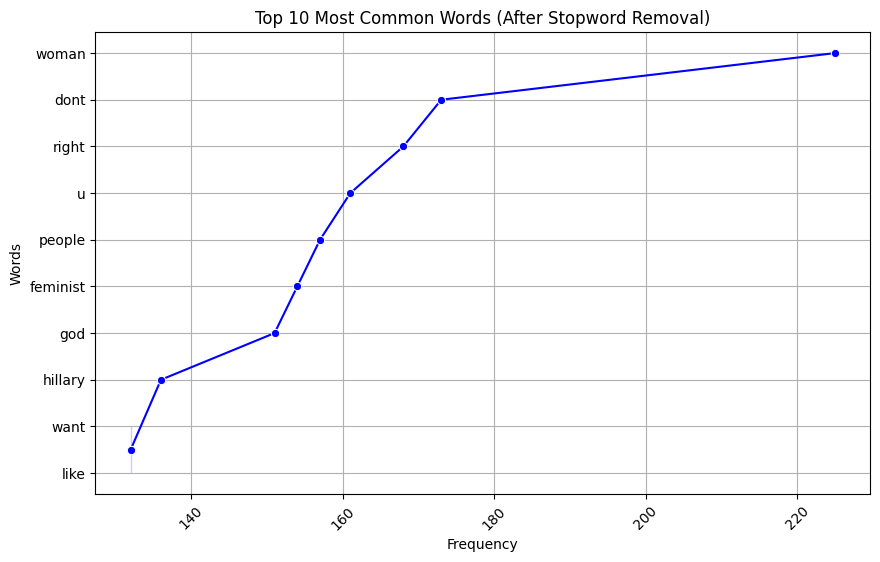

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(counts), y=list(words), marker='o', color='b', linestyle='-')

plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 10 Most Common Words (After Stopword Removal)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


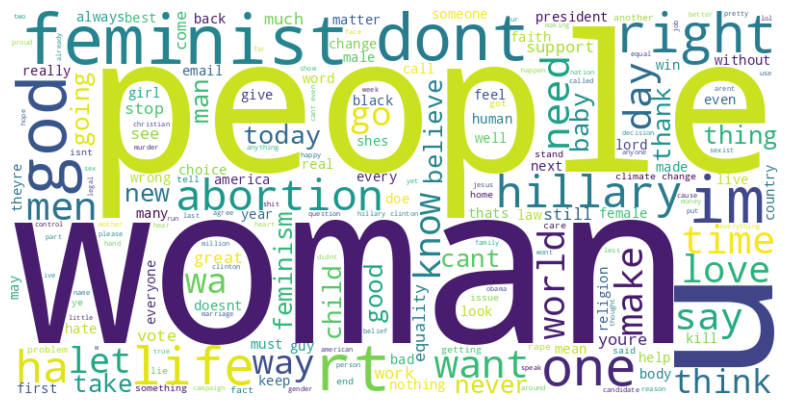

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

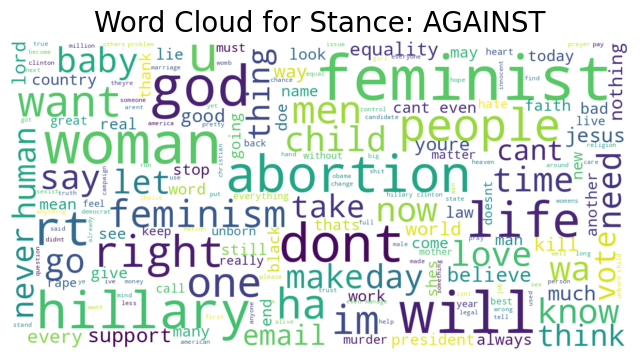

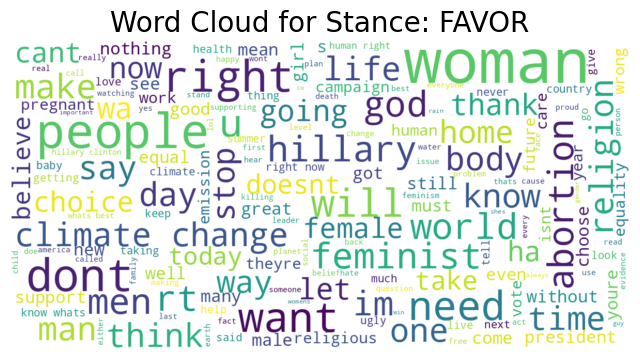

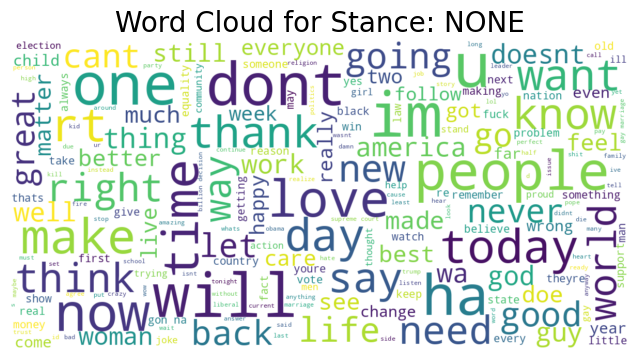

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_word_cloud(text, title):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=42
    ).generate(text)

    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

unique_stances = data['Stance'].unique()

for stance in unique_stances:
    subset = data[data['Stance'] == stance]
    text = ' '.join(subset['cleaned_tweet'])
    plot_word_cloud(text, f'Word Cloud for Stance: {stance}')


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

corpus = data['text_no_stopwords'].dropna().tolist()

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

count_vectorizer = CountVectorizer(max_features=1000)
count_matrix = count_vectorizer.fit_transform(corpus)

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

print("TF-IDF Representation:")
display(tfidf_df.head())

print("\nCount Vectorization Representation:")
display(count_df.head())

TF-IDF Representation:


,ability,able,abort,aborted,abortion,access,account,act,action,actually,...,year,yes,yet,yo,youd,youll,young,youre,youve,yr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Count Vectorization Representation:


,ability,able,abort,aborted,abortion,access,account,act,action,actually,...,year,yes,yet,yo,youd,youll,young,youre,youve,yr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

data[['Target', 'Stance']] = data[['Target', 'Stance']].apply(LabelEncoder().fit_transform)

In [ ]:
X = data['cleaned_tweet']
y = data['Stance']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from nltk.stem import WordNetLemmatizer
from fastai.text.all import *
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer

In [ ]:
from sklearn.metrics import accuracy_score

dls = TextDataLoaders.from_df(data, text_col='cleaned_tweet', label_col='Stance', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, metrics=accuracy)
learn.fine_tune(4)

y_pred = learn.get_preds(dl=dls.test_dl(X_test))[0]

accuracy = accuracy_score(y_test, y_pred.argmax(dim=1))
print("ULMFiT Test Accuracy:", accuracy)

epoch,train_loss,valid_loss,accuracy,time
0,1.150687,1.026676,0.512028,00:05


epoch,train_loss,valid_loss,accuracy,time
0,1.031680,0.985401,0.560137,00:04
1,0.997326,0.960275,0.570447,00:03
2,0.929210,0.945810,0.558419,00:04
3,0.872235,0.944946,0.567010,00:04


ULMFiT Test Accuracy: 0.7101200686106347


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=50)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=50)

lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=50),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = lstm_model.fit(X_train_seq, y_train, epochs=5, batch_size=32, validation_data=(X_test_seq, y_test))

train_accuracy = history.history['accuracy'][-1]
test_accuracy = history.history['val_accuracy'][-1]

print(f"Final training accuracy: {train_accuracy:.4f}")
print(f"Final test accuracy: {test_accuracy:.4f}")


Epoch 1/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.2751 - loss: 0.5821 - val_accuracy: 0.2693 - val_loss: 0.4136
Epoch 2/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3568 - loss: 0.0975 - val_accuracy: 0.4374 - val_loss: 0.1324
Epoch 3/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5443 - loss: -6.8489 - val_accuracy: 0.3877 - val_loss: 6.4907
Epoch 4/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5575 - loss: -37.7730 - val_accuracy: 0.3962 - val_loss: 10.8046
Epoch 5/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5859 - loss: -115.5332 - val_accuracy: 0.4237 - val_loss: -5.7286
Final training accuracy: 0.5912
Final test accuracy: 0.4237


In [ ]:
from tensorflow.keras.layers import Bidirectional

bilstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=50),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = bilstm_model.fit(X_train_seq, y_train, epochs=5, batch_size=32, validation_data=(X_test_seq, y_test))

train_accuracy = history.history['accuracy'][-1]
test_accuracy = history.history['val_accuracy'][-1]

print(f"Final training accuracy: {train_accuracy:.4f}")
print(f"Final test accuracy: {test_accuracy:.4f}")


Epoch 1/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.2671 - loss: 0.5694 - val_accuracy: 0.2590 - val_loss: 0.4305
Epoch 2/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3159 - loss: 0.0327 - val_accuracy: 0.3722 - val_loss: 0.5265
Epoch 3/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4530 - loss: -6.5681 - val_accuracy: 0.3636 - val_loss: 1.3444
Epoch 4/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4624 - loss: -23.4507 - val_accuracy: 0.4168 - val_loss: 12.1374
Epoch 5/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4615 - loss: -103.4301 - val_accuracy: 0.3997 - val_loss: -0.7797
Final training accuracy: 0.4788
Final test accuracy: 0.3997


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import torch
from transformers import BartTokenizer, BartForSequenceClassification, RobertaTokenizer, RobertaForSequenceClassification
from torch.utils.data import DataLoader, Dataset

bart_model_name = "facebook/bart-large-mnli"
bart_tokenizer = BartTokenizer.from_pretrained(bart_model_name)
bart_model = BartForSequenceClassification.from_pretrained(bart_model_name)
bart_model.eval()

roberta_model_name = "roberta-large-mnli"
roberta_tokenizer = RobertaTokenizer.from_pretrained(roberta_model_name)
roberta_model = RobertaForSequenceClassification.from_pretrained(roberta_model_name)
roberta_model.eval()

class StanceDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts.tolist()
        self.labels = labels.tolist()
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx], truncation=True, padding="max_length", max_length=self.max_length, return_tensors="pt"
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "label": torch.tensor(self.labels[idx], dtype=torch.long),
        }

test_dataset = StanceDataset(X_test, y_test, bart_tokenizer)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

def get_predictions(model, dataloader, device="cuda" if torch.cuda.is_available() else "cpu"):
    model.to(device)
    predictions, true_labels = [], []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["label"].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).cpu().numpy()

            predictions.extend(preds)
            true_labels.extend(labels.cpu().numpy())

    return predictions, true_labels

bart_preds, bart_actuals = get_predictions(bart_model, test_loader)

roberta_preds, roberta_actuals = get_predictions(roberta_model, test_loader)

bart_accuracy = accuracy_score(bart_actuals, bart_preds)
print("============**********************************=====================")
print(f"BART Accuracy: {bart_accuracy:.4f}")

roberta_accuracy = accuracy_score(roberta_actuals, roberta_preds)
print("============**********************************=====================")
print(f"RoBERTa Accuracy: {roberta_accuracy:.4f}")


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/688 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


============**********************************=====================
BART Accuracy: 0.2710
============**********************************=====================
RoBERTa Accuracy: 0.2762


In [ ]:
from sklearn.metrics import classification_report

ulmfit_y_pred = y_pred.argmax(dim=1).numpy()
print("\nULMFiT Classification Report:\n", classification_report(y_test, ulmfit_y_pred))

lstm_y_pred = (lstm_model.predict(X_test_seq) > 0.5).astype("int32")
print("\nLSTM Classification Report:\n", classification_report(y_test, lstm_y_pred))

bilstm_y_pred = (bilstm_model.predict(X_test_seq) > 0.5).astype("int32")
print("\nBiLSTM Classification Report:\n", classification_report(y_test, bilstm_y_pred))

print("\nBART Classification Report:\n", classification_report(bart_actuals, bart_preds))

print("\nRoBERTa Classification Report:\n", classification_report(roberta_actuals, roberta_preds))


ULMFiT Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.78       282
           1       0.74      0.56      0.64       151
           2       0.62      0.67      0.65       150

    accuracy                           0.71       583
   macro avg       0.70      0.68      0.69       583
weighted avg       0.71      0.71      0.71       583

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.63      0.59       282
           1       0.26      0.45      0.33       151
           2       0.00      0.00      0.00       150

    accuracy                           0.42       583
   macro avg       0.27      0.36      0.31       583
weighted avg       0.33      0.42      0.37       583

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step

BiLSTM Classification Report:
               precision    recall  f1-score   support

         

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

ulmfit_report = classification_report(y_test, ulmfit_y_pred, output_dict=True)
lstm_report = classification_report(y_test, lstm_y_pred, output_dict=True)
bilstm_report = classification_report(y_test, bilstm_y_pred, output_dict=True)
bart_report = classification_report(bart_actuals, bart_preds, output_dict=True)
roberta_report = classification_report(roberta_actuals, roberta_preds, output_dict=True)

comparison_data = {
    "Model": ["ULMFiT", "LSTM", "BiLSTM", "BART", "RoBERTa"],
    "Precision": [
        ulmfit_report["weighted avg"]["precision"],
        lstm_report["weighted avg"]["precision"],
        bilstm_report["weighted avg"]["precision"],
        bart_report["weighted avg"]["precision"],
        roberta_report["weighted avg"]["precision"]
    ],
    "Recall": [
        ulmfit_report["weighted avg"]["recall"],
        lstm_report["weighted avg"]["recall"],
        bilstm_report["weighted avg"]["recall"],
        bart_report["weighted avg"]["recall"],
        roberta_report["weighted avg"]["recall"]
    ],
    "F1-Score": [
        ulmfit_report["weighted avg"]["f1-score"],
        lstm_report["weighted avg"]["f1-score"],
        bilstm_report["weighted avg"]["f1-score"],
        bart_report["weighted avg"]["f1-score"],
        roberta_report["weighted avg"]["f1-score"]
    ]
}

comparison_df = pd.DataFrame(comparison_data)

print("\nModel Performance Comparison Table:")
print(comparison_df.to_string(index=False))


Model Performance Comparison Table:
  Model  Precision   Recall  F1-Score
 ULMFiT   0.712582 0.710120  0.706886
   LSTM   0.334675 0.423671  0.371406
 BiLSTM   0.373967 0.399657  0.357087
   BART   0.333500 0.271012  0.154404
RoBERTa   0.369447 0.276158  0.175639


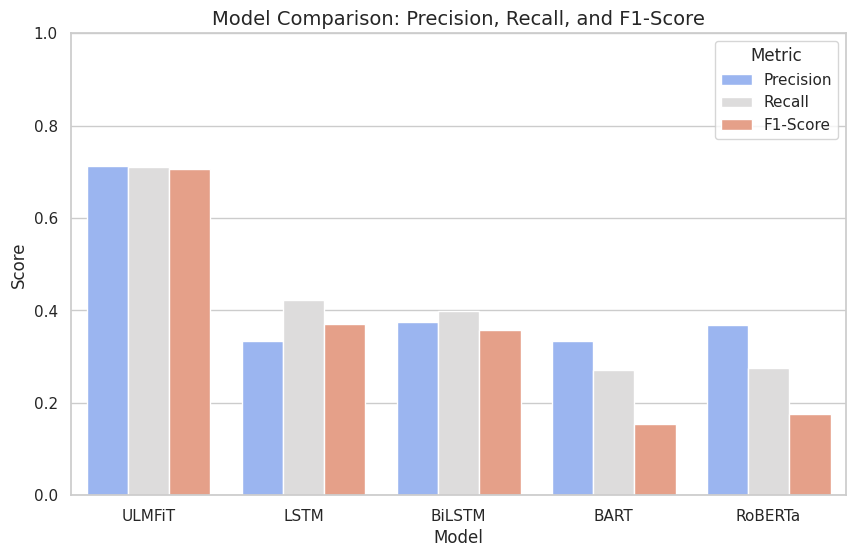

In [ ]:
sns.set(style="whitegrid")

comparison_melted = pd.melt(comparison_df, id_vars=["Model"], var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Score", hue="Metric", data=comparison_melted, palette="coolwarm")

plt.title("Model Comparison: Precision, Recall, and F1-Score", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, 1)
plt.legend(title="Metric")
plt.show()